In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the Titanic dataset (assuming it's in CSV format)
df = pd.read_csv('titanic.csv')


In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:

# Compute the mean of the 'Age' column
mean_age = df['Age'].mean()

# Fill NaN values in 'Age' column with the mean
df['Age'].fillna(mean_age, inplace=True)

In [6]:
# Fill missing cabins based on Pclass and/or other features
df['Cabin'] = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [7]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,G6,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,D,C


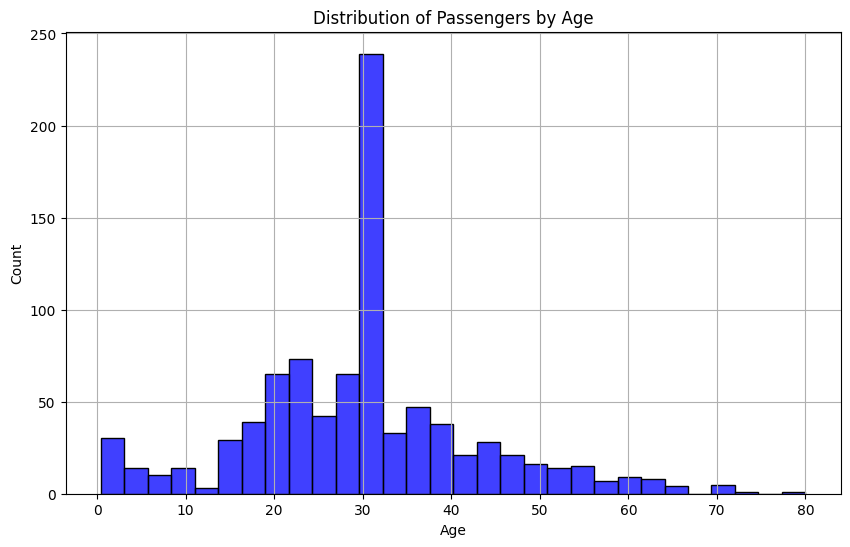

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Distribution of Passengers by Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

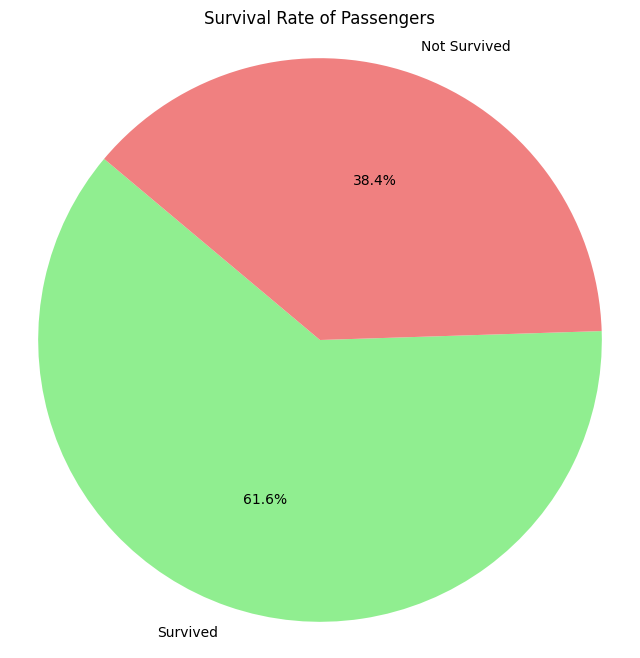

In [9]:
# Survival Rate
plt.figure(figsize=(8, 8))
labels = ['Survived', 'Not Survived']
sizes = df['Survived'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('Survival Rate of Passengers')
plt.axis('equal')
plt.show()

In [10]:
# Correlation Heatmap
df1 = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']


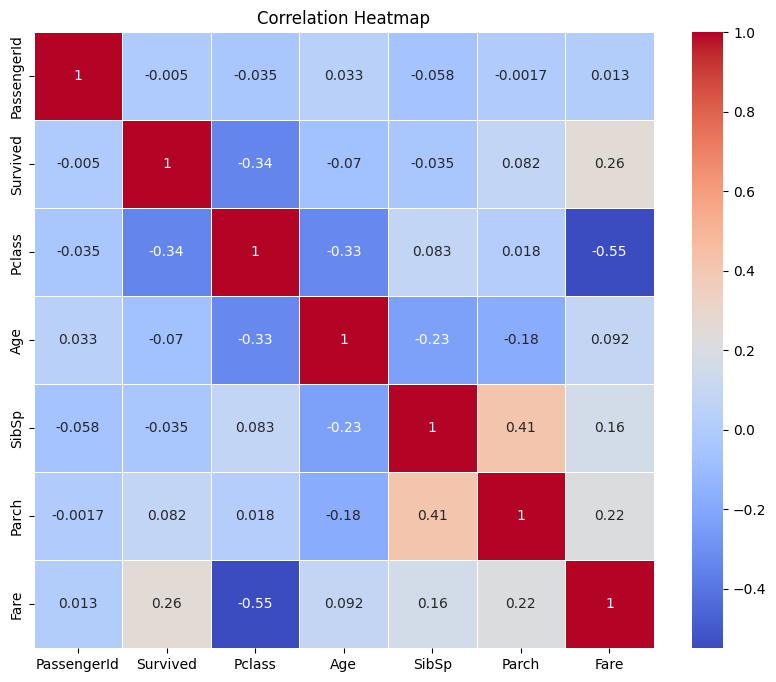

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[df1].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Define features (X) and target variable (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)


In [13]:
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [15]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [16]:

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.62

Confusion Matrix:
[[104   1]
 [ 67   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       105
           1       0.88      0.09      0.17        74

    accuracy                           0.62       179
   macro avg       0.74      0.54      0.46       179
weighted avg       0.72      0.62      0.51       179



/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


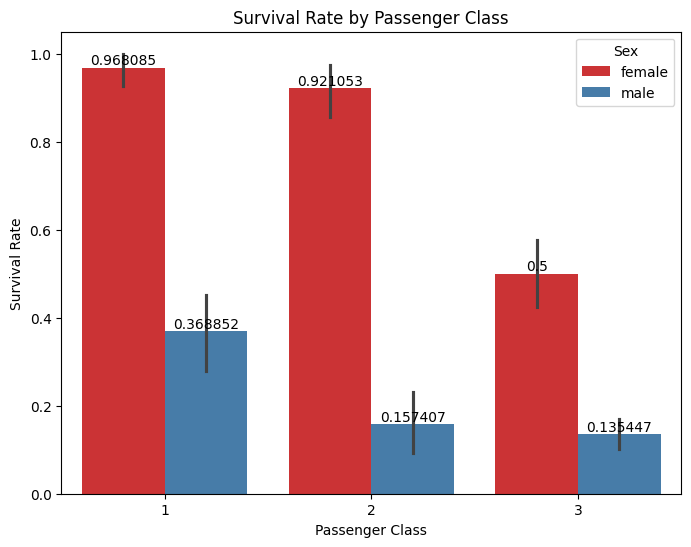

In [17]:
# Survival by Class
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Pclass', y='Survived', data=df, palette='Set1',hue = 'Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

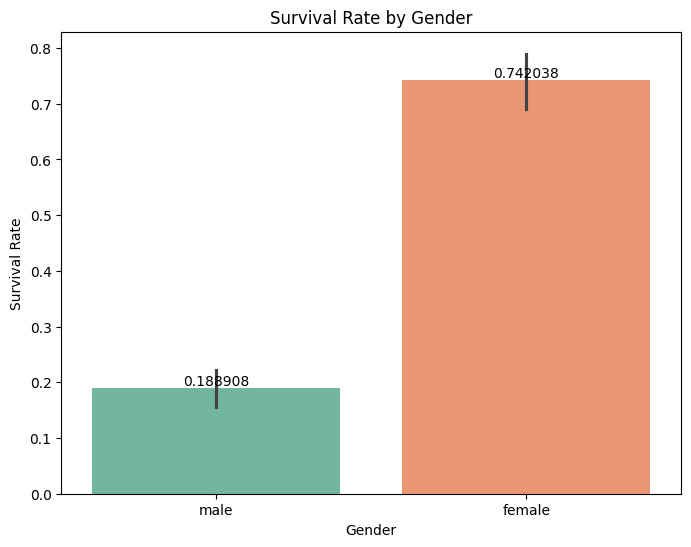

In [18]:

# Survival by Gender
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='Survived', data=df, palette='Set2', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [19]:
# Separate features (X) and target variable (y)
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Define categorical and numerical features
cat_features = ['Sex', 'Embarked']
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [20]:

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)



In [21]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)])


In [22]:

# Define parameters grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
    }

In [23]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:
{'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation score:
0.8272037821333595


In [24]:


# Predictions on the testing set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.83

Confusion Matrix:
[[94 11]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [25]:

# Define categorical and numerical features
cat_features = ['Sex', 'Embarked']
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

In [26]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer([('num', num_pipeline, num_features),('cat', cat_pipeline, cat_features)])

In [29]:

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, bootstrap=True, random_state=42)

In [30]:

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predictions on the testing set
y_pred = pipeline.predict(X_test)

In [31]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.84

Confusion Matrix:
[[96  9]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



#### Summary of Findings:
- Passengers in higher classes had higher survival rates.
- Women and children had higher survival rates compared to men.
- Age and fare also had some influence on survival probability.
- We use simple logistics Regression model to find the accuracy rate which is 62% not to accurate.
- After We try finding the accuracy by GridsearchCV model whis 82% on the test set.
- We find that the GridsearchCV model is more time consuming with some best accuracy
- Then we find that The Random Forest model achieved an accuracy of 84% on the test set and also it is not too much time takes as compared to GridsearchCV.

#### Recommendations:
- Consider prioritizing safety measures for lower-class passengers.
- Implement policies that prioritize the evacuation of women and children.
- Further investigate the impact of age and fare on survival rates for future safety protocols
.